# The relationship between Political Learning and COVID

### Project Summary
- In this project, we will take three datasets from the Internet: 1. confirmed coronavirus cases by county; 2. population data by county; 3. 2016 presidential election.
- We will clean these three datasets and make them usable, then unite them to access possible correlations among spread of the coronavirus, population, and political affiliation among states in the US. 
- The whole project is divided into parts:
    - Importing datasets
    - Create a united DataFrame
    - Apply SciPy’s curve_fit function
    - Explore correlation between political leaning and any of the other variables related to the coronavirus.
    - Testing and report on statistically significant

### Step 1&2: Importing & Editing Data into United DataFrame

In [ ]:
# Step 1: Importing Data (Question 1&2)
## Set up Environment
import numpy as np
import glob
import matplotlib.pyplot as plt 
import os
working_directory = os.getcwd() 
import pandas as pd 
print(working_directory)

In [12]:
# Step 2: Create a united dataframe (Question 3)
## 3.Create a single united pandas DataFrame that combines the 3 datasets,
## where each row is uniquely identified by its state 
##(as a two-letter abbreviation).
election = pd.read_csv('election.csv',index_col=0)
election
### Write a code that remove rows that aren't for entire states
#filter the rows that are not for entire states
filter_rows = election[election['state.1'].str.len()>2]
# drop the filtered rows
df_election = pd.concat([election,filter_rows,filter_rows]).drop_duplicates(keep=False)
# The final result shows the rows that represent for entire states
df_election

,state.1,Hillary Clinton,percentage1,percentage2,Donald Trump
state,,,,,
GA,GA,Hillary Clinton,46,51,Donald Trump
IN,IN,Hillary Clinton,38,57,Donald Trump
KY,KY,Hillary Clinton,33,63,Donald Trump
SC,SC,Hillary Clinton,41,55,Donald Trump
VA,VA,Hillary Clinton,50,45,Donald Trump
VT,VT,Hillary Clinton,61,33,Donald Trump
NC,NC,Hillary Clinton,47,51,Donald Trump
OH,OH,Hillary Clinton,44,52,Donald Trump
WV,WV,Hillary Clinton,26,69,Donald Trump


In [24]:
## Create dataframes from existing CSV files
dataFrame1 = pd.read_csv("Covid1.csv")
by_state_df1 = dataFrame1.groupby('State').sum().iloc[:,2:]
dataFrame2 = pd.read_csv("Covid2.csv")
## Merge the COVID dataframes since they are exactly matched
mergedCovid = pd.merge(by_state_df1,dataFrame2,on='State',how="outer")
mergedCovid

,State,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,countyFIPS,County Name,population
0,AK,0,0,0,0,0,0,0,0,0,...,224681,224927,225088,225483,225747,225983,225983,0,Statewide Unallocated,0
1,AK,0,0,0,0,0,0,0,0,0,...,224681,224927,225088,225483,225747,225983,225983,2013,Aleutians East Borough,3337
2,AK,0,0,0,0,0,0,0,0,0,...,224681,224927,225088,225483,225747,225983,225983,2016,Aleutians West Census Area,5634
3,AK,0,0,0,0,0,0,0,0,0,...,224681,224927,225088,225483,225747,225983,225983,2020,Municipality of Anchorage,288000
4,AK,0,0,0,0,0,0,0,0,0,...,224681,224927,225088,225483,225747,225983,225983,2050,Bethel Census Area,18386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,WY,0,0,0,0,0,0,0,0,0,...,154549,154549,154909,154909,154909,154909,154909,56037,Sweetwater County,42343
3191,WY,0,0,0,0,0,0,0,0,0,...,154549,154549,154909,154909,154909,154909,154909,56039,Teton County,23464
3192,WY,0,0,0,0,0,0,0,0,0,...,154549,154549,154909,154909,154909,154909,154909,56041,Uinta County,20226
3193,WY,0,0,0,0,0,0,0,0,0,...,154549,154549,154909,154909,154909,154909,154909,56043,Washakie County,7805


In [25]:
## Merge the last dataframe with election information
df_files = pd.merge(mergedCovid,df_election,left_on='State',right_on='state.1',how="outer")
df_files

,State,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2022-03-03,2022-03-04,countyFIPS,County Name,population,state.1,Hillary Clinton,percentage1,percentage2,Donald Trump
0,AK,0,0,0,0,0,0,0,0,0,...,225983,225983,0,Statewide Unallocated,0,AK,Hillary Clinton,38,53,Donald Trump
1,AK,0,0,0,0,0,0,0,0,0,...,225983,225983,2013,Aleutians East Borough,3337,AK,Hillary Clinton,38,53,Donald Trump
2,AK,0,0,0,0,0,0,0,0,0,...,225983,225983,2016,Aleutians West Census Area,5634,AK,Hillary Clinton,38,53,Donald Trump
3,AK,0,0,0,0,0,0,0,0,0,...,225983,225983,2020,Municipality of Anchorage,288000,AK,Hillary Clinton,38,53,Donald Trump
4,AK,0,0,0,0,0,0,0,0,0,...,225983,225983,2050,Bethel Census Area,18386,AK,Hillary Clinton,38,53,Donald Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,WY,0,0,0,0,0,0,0,0,0,...,154909,154909,56037,Sweetwater County,42343,WY,Hillary Clinton,22,70,Donald Trump
3191,WY,0,0,0,0,0,0,0,0,0,...,154909,154909,56039,Teton County,23464,WY,Hillary Clinton,22,70,Donald Trump
3192,WY,0,0,0,0,0,0,0,0,0,...,154909,154909,56041,Uinta County,20226,WY,Hillary Clinton,22,70,Donald Trump
3193,WY,0,0,0,0,0,0,0,0,0,...,154909,154909,56043,Washakie County,7805,WY,Hillary Clinton,22,70,Donald Trump


- Now the united dataframe is created

### Step 3: Apply SciPy’s curve_fit function: (Question4)

In [400]:
# The SciPy’s curve_fit function takes any pandas Series and fit any one-variable model.
## Update Environment:
import math
import scipy.stats as stats
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
## Loads data and defines a function
by_state_df = df_files.groupby('State').sum().iloc[:,2:]
def cases_over_time_in_state(state_abbreviation):
    return by_state_df.loc[state_abbreviation,:]
## Apply function to the data for Massachusetts, store it in a variable
MA_cases = cases_over_time_in_state('MA')
MA_cases
## We will use the logistic model
def logistic_curve(x,β_0,β_1,β_2):
    return β_0/(1+np.exp(β_1*(-x+β_2)))

- Import the curve_fit function and use it to find the βs, as suggested in the curve fitting. Below are the detailed explaination of the coeffcients: 
    - β_0 is the maximum number of cases in the data, data.max()
    - β_1 = 1
    - β_2 = the half way point from the beginning until now, len(data)/2

In [30]:
## Apply to the function:
xs = np.arange(len(MA_cases))
ys = MA_cases
my_guessed_betas = [ys.max(),1,len(xs)/2]
found_betas,covariance = curve_fit(logistic_curve,xs,ys,p0=my_guessed_betas)
β_0,β_1,β_2 = found_betas
β_0,β_1,β_2

(33431397.654432457, 0.004931331854922255, 706.8725276073285)

- The above output means that the optimal β values found by SciPy in this case are β0 is around 33431397.65; β1 is around 0.0049; β2 is around 706.87

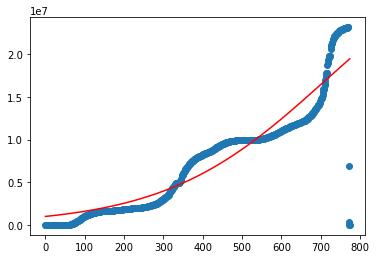

In [31]:
# Plot the model as shown in order to see how the logistic model fits the data
fit_model = lambda x: logistic_curve(x,β_0,β_1,β_2)
plt.scatter(xs,ys)
plt.plot(xs,fit_model(xs),'r-')
plt.show()

In [38]:
# From the example above, we can summary a function that can return βs for the entire dataframe
def logistic_model_for_state(state_abbreviation):
    ys = cases_over_time_in_state(state_abbreviation)
    xs = np.arange(len(ys))
    guessed_betas = [ys.max(),1,len(xs)/2]
    found_betas, covariance = curve_fit(logistic_curve,xs,ys,p0=guessed_betas)
    β_0,β_1,β_2 = found_betas
    fit_model2 = lambda x: logistic_curve(x,β_0,β_1,β_2)
    return fit_model2
# Return the βs for each rows of the DataFrame
print(found_betas)

[3.34313977e+07 4.93133185e-03 7.06872528e+02]


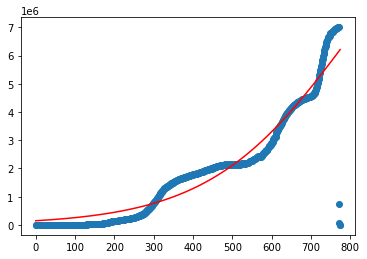

[3.34313977e+07 4.93133185e-03 7.06872528e+02]


In [37]:
## Set up functions which can plot any logistic models with any state we want
def plot_data_and_model (data,model):
    xs = np.arange(len(data))
    ys = data
    plt.scatter(xs,ys)
    plt.plot(xs,model(xs),'r-')
    plt.show()
## Can see the logistic model of state AK.
plot_data_and_model(cases_over_time_in_state('AK'),logistic_model_for_state('AK'))

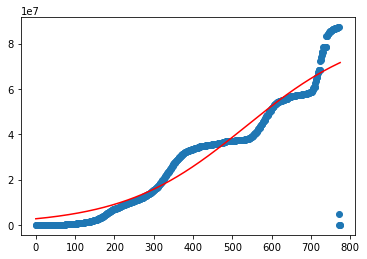

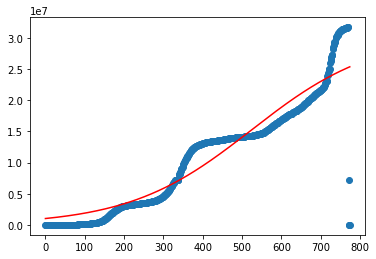

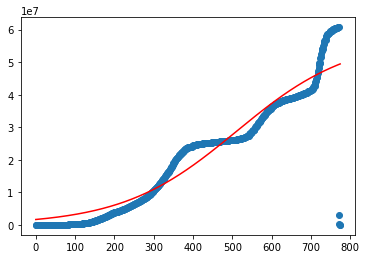

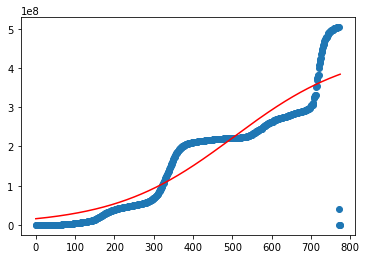

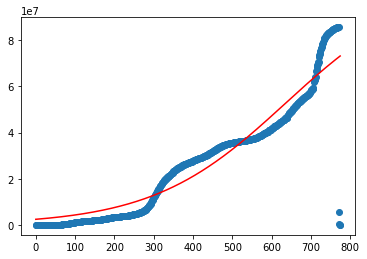

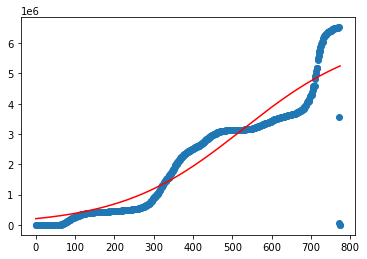

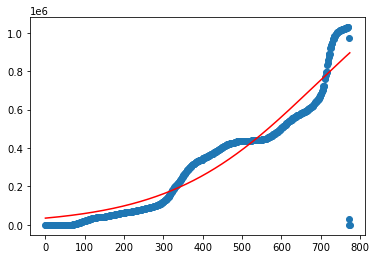

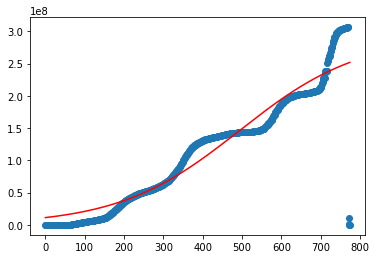

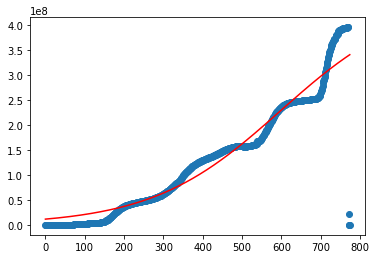

In [43]:
## The logistic model for rest states:
plot_data_and_model(cases_over_time_in_state('AL'),logistic_model_for_state('AL'))
plot_data_and_model(cases_over_time_in_state('AZ'),logistic_model_for_state('AZ'))
plot_data_and_model(cases_over_time_in_state('AR'),logistic_model_for_state('AR'))
plot_data_and_model(cases_over_time_in_state('CA'),logistic_model_for_state('CA'))
plot_data_and_model(cases_over_time_in_state('CO'),logistic_model_for_state('CO'))
plot_data_and_model(cases_over_time_in_state('CT'),logistic_model_for_state('CT'))
plot_data_and_model(cases_over_time_in_state('DE'),logistic_model_for_state('DE'))
## State DC only has 1 values which can not form the models
plot_data_and_model(cases_over_time_in_state('GA'),logistic_model_for_state('GA'))
plot_data_and_model(cases_over_time_in_state('FL'),logistic_model_for_state('FL'))

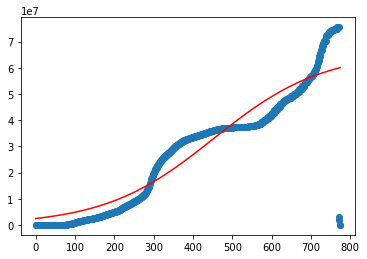

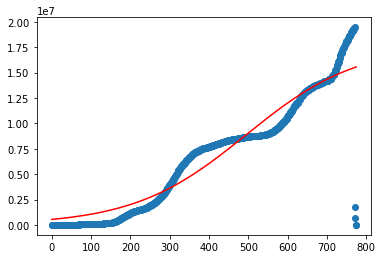

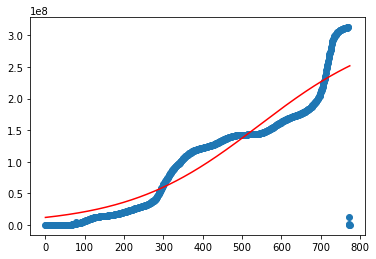

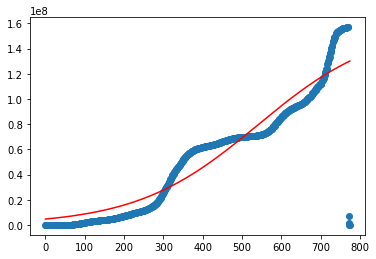

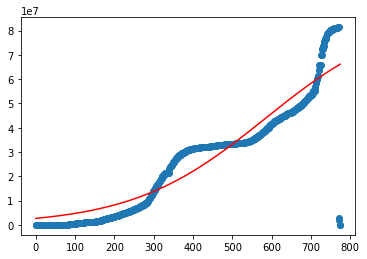

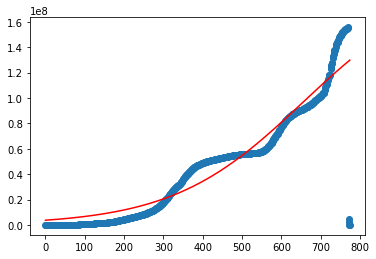

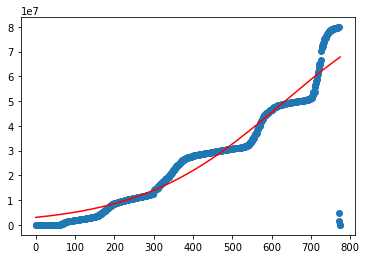

In [46]:
## HI also has too little datasets
plot_data_and_model(cases_over_time_in_state('IA'),logistic_model_for_state('IA'))
plot_data_and_model(cases_over_time_in_state('ID'),logistic_model_for_state('ID'))
plot_data_and_model(cases_over_time_in_state('IL'),logistic_model_for_state('IL'))
plot_data_and_model(cases_over_time_in_state('IN'),logistic_model_for_state('IN'))
plot_data_and_model(cases_over_time_in_state('KS'),logistic_model_for_state('KS'))
plot_data_and_model(cases_over_time_in_state('KY'),logistic_model_for_state('KY'))
plot_data_and_model(cases_over_time_in_state('LA'),logistic_model_for_state('LA'))

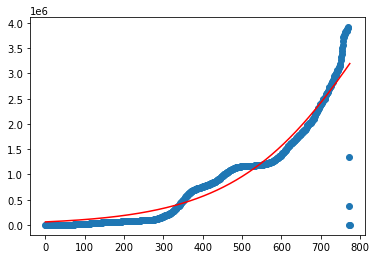

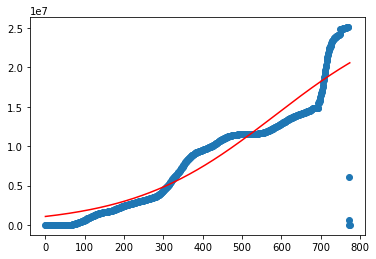

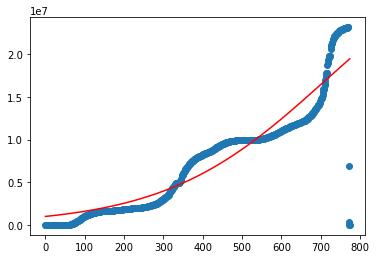

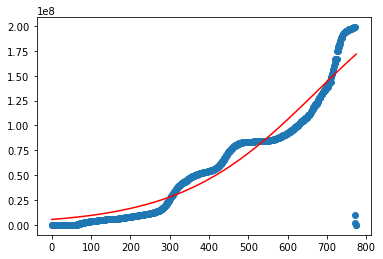

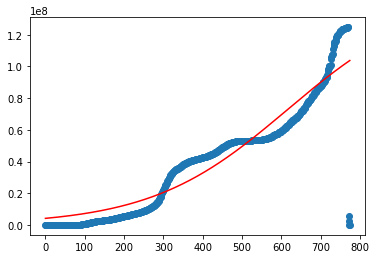

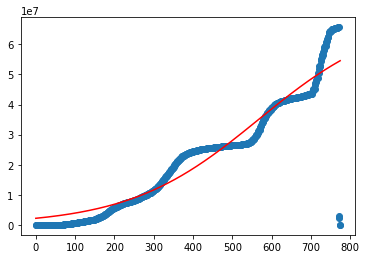

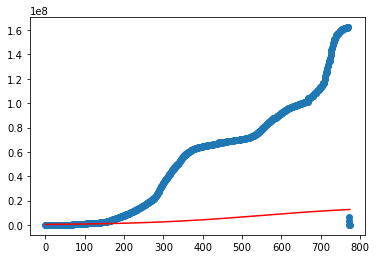

In [48]:
plot_data_and_model(cases_over_time_in_state('ME'),logistic_model_for_state('ME'))
plot_data_and_model(cases_over_time_in_state('MD'),logistic_model_for_state('MD'))
plot_data_and_model(cases_over_time_in_state('MA'),logistic_model_for_state('MA'))
plot_data_and_model(cases_over_time_in_state('MI'),logistic_model_for_state('MI'))
plot_data_and_model(cases_over_time_in_state('MN'),logistic_model_for_state('MN'))
plot_data_and_model(cases_over_time_in_state('MS'),logistic_model_for_state('MS'))
plot_data_and_model(cases_over_time_in_state('MO'),logistic_model_for_state('MT'))

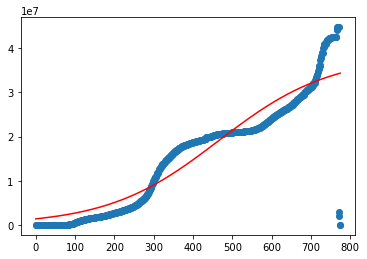

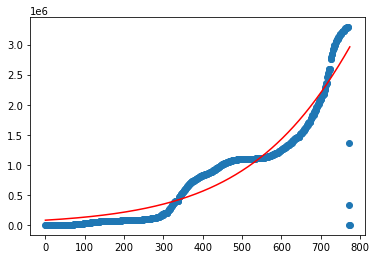

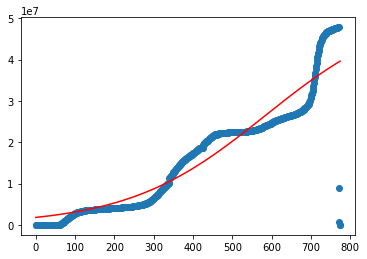

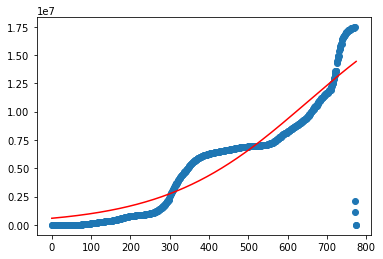

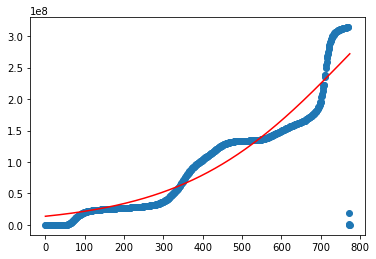

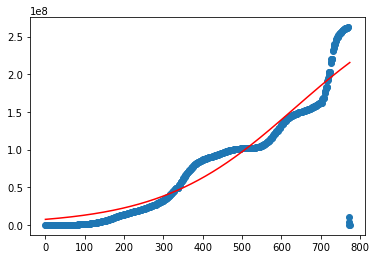

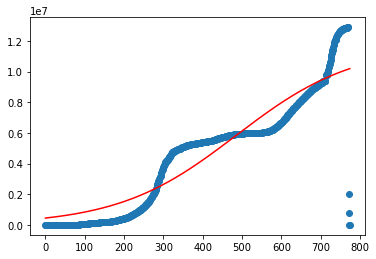

In [50]:
plot_data_and_model(cases_over_time_in_state('NE'),logistic_model_for_state('NE'))
plot_data_and_model(cases_over_time_in_state('NH'),logistic_model_for_state('NH'))
plot_data_and_model(cases_over_time_in_state('NJ'),logistic_model_for_state('NJ'))
plot_data_and_model(cases_over_time_in_state('NM'),logistic_model_for_state('NM'))
plot_data_and_model(cases_over_time_in_state('NY'),logistic_model_for_state('NY'))
plot_data_and_model(cases_over_time_in_state('NC'),logistic_model_for_state('NC'))
plot_data_and_model(cases_over_time_in_state('ND'),logistic_model_for_state('ND'))

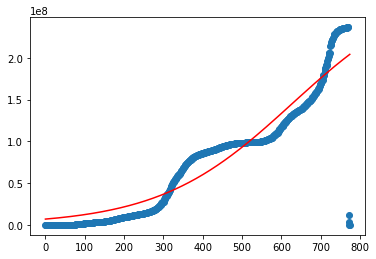

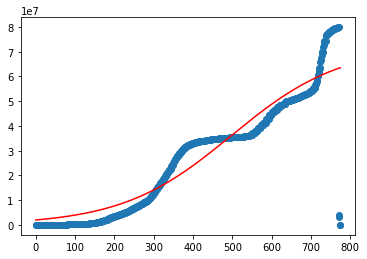

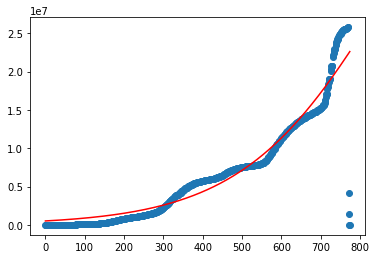

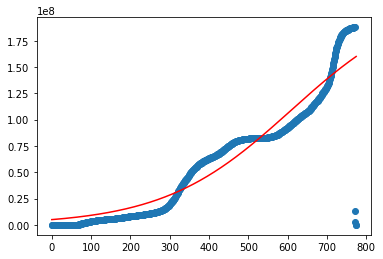

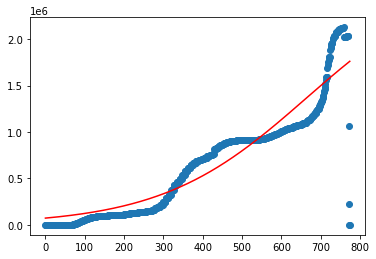

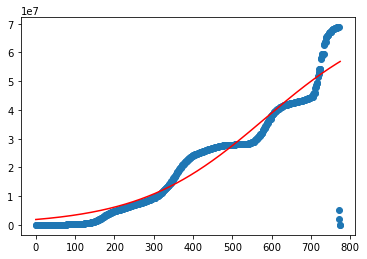

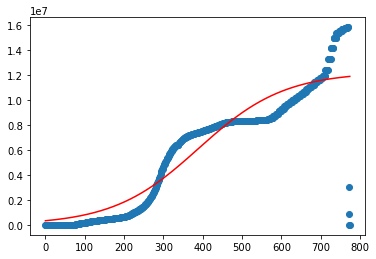

In [53]:
plot_data_and_model(cases_over_time_in_state('OH'),logistic_model_for_state('OH'))
plot_data_and_model(cases_over_time_in_state('OK'),logistic_model_for_state('OK'))
plot_data_and_model(cases_over_time_in_state('OR'),logistic_model_for_state('OR'))
plot_data_and_model(cases_over_time_in_state('PA'),logistic_model_for_state('PA'))
plot_data_and_model(cases_over_time_in_state('RI'),logistic_model_for_state('RI'))
plot_data_and_model(cases_over_time_in_state('SC'),logistic_model_for_state('SC'))
plot_data_and_model(cases_over_time_in_state('SD'),logistic_model_for_state('SD'))

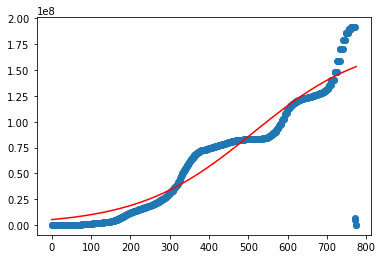

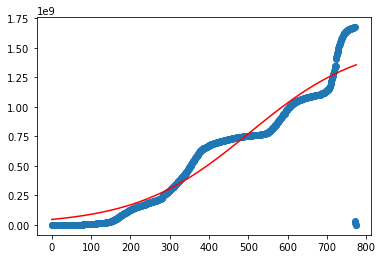

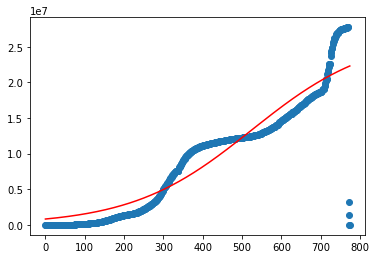

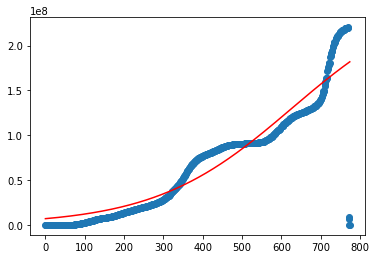

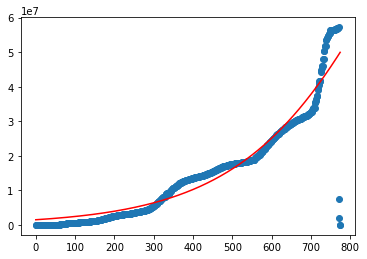

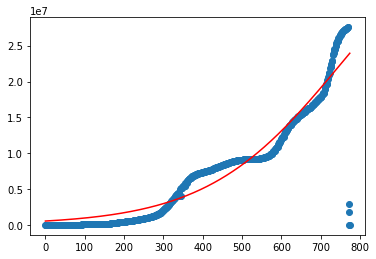

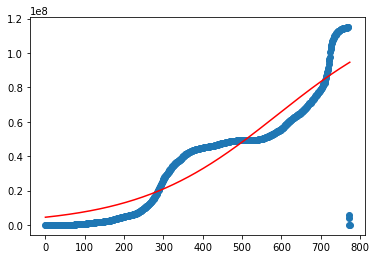

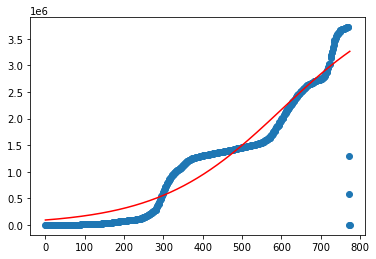

In [56]:
plot_data_and_model(cases_over_time_in_state('TN'),logistic_model_for_state('TN'))
plot_data_and_model(cases_over_time_in_state('TX'),logistic_model_for_state('TX'))
plot_data_and_model(cases_over_time_in_state('UT'),logistic_model_for_state('UT'))
## VT has reached maxfev = 800.
plot_data_and_model(cases_over_time_in_state('VA'),logistic_model_for_state('VA'))
plot_data_and_model(cases_over_time_in_state('WA'),logistic_model_for_state('WA'))
plot_data_and_model(cases_over_time_in_state('WV'),logistic_model_for_state('WV'))
plot_data_and_model(cases_over_time_in_state('WI'),logistic_model_for_state('WI'))
plot_data_and_model(cases_over_time_in_state('WY'),logistic_model_for_state('WY'))


### Step 4: Exploring Correlations

- After figure out the distribution of the datasets and how well the logistic model fits it, we are wondering is there any correlation between a state’s political leaning and any of the following variables related to the coronavirus? Since datasets can tell many stories, checking for correlations between variables seems neccessary.
    - Correlation is a way to determine if two variables in a dataset are related in any way. When building machine learning models correlations are an important factor in determining features. Not only can this help us to see which features are linear related, but if features are strongly correlated we can remove them to prevent duplicating information.
    - We can use heat map to find strong correlation in a dataset
    - The below coding is how we analysis the correlations we found.


- How we find correlations in Python:
    - Using the Pandas correlation method corr() to see correlations for all numerical columns.
    - The corr() method has a parameter that allows us to choose which method to find correlation coefficient, while the Pearson method is the default one.

In [398]:
# Step 4: Explore Correlations (Question5) 
## Drop the unnecessary columns
df_new = df_files.drop(columns='state.1')
df_new = df_new.drop(columns='Hillary Clinton')
df_new = df_new.drop(columns='Donald Trump')
df_new = df_new.drop(columns='County Name')
# Get the whole new dataframe with no non-meaningless values
df_new

,State,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,countyFIPS,population,percentage1,percentage2
0,AK,0,0,0,0,0,0,0,0,0,...,224927,225088,225483,225747,225983,225983,0,0,38,53
1,AK,0,0,0,0,0,0,0,0,0,...,224927,225088,225483,225747,225983,225983,2013,3337,38,53
2,AK,0,0,0,0,0,0,0,0,0,...,224927,225088,225483,225747,225983,225983,2016,5634,38,53
3,AK,0,0,0,0,0,0,0,0,0,...,224927,225088,225483,225747,225983,225983,2020,288000,38,53
4,AK,0,0,0,0,0,0,0,0,0,...,224927,225088,225483,225747,225983,225983,2050,18386,38,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,WY,0,0,0,0,0,0,0,0,0,...,154549,154909,154909,154909,154909,154909,56037,42343,22,70
3191,WY,0,0,0,0,0,0,0,0,0,...,154549,154909,154909,154909,154909,154909,56039,23464,22,70
3192,WY,0,0,0,0,0,0,0,0,0,...,154549,154909,154909,154909,154909,154909,56041,20226,22,70
3193,WY,0,0,0,0,0,0,0,0,0,...,154549,154909,154909,154909,154909,154909,56043,7805,22,70


In [399]:
## Remove the repeated values
df = df_new.drop_duplicates()
df

,State,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,countyFIPS,population,percentage1,percentage2
0,AK,0,0,0,0,0,0,0,0,0,...,224927,225088,225483,225747,225983,225983,0,0,38,53
1,AK,0,0,0,0,0,0,0,0,0,...,224927,225088,225483,225747,225983,225983,2013,3337,38,53
2,AK,0,0,0,0,0,0,0,0,0,...,224927,225088,225483,225747,225983,225983,2016,5634,38,53
3,AK,0,0,0,0,0,0,0,0,0,...,224927,225088,225483,225747,225983,225983,2020,288000,38,53
4,AK,0,0,0,0,0,0,0,0,0,...,224927,225088,225483,225747,225983,225983,2050,18386,38,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,WY,0,0,0,0,0,0,0,0,0,...,154549,154909,154909,154909,154909,154909,56037,42343,22,70
3191,WY,0,0,0,0,0,0,0,0,0,...,154549,154909,154909,154909,154909,154909,56039,23464,22,70
3192,WY,0,0,0,0,0,0,0,0,0,...,154549,154909,154909,154909,154909,154909,56041,20226,22,70
3193,WY,0,0,0,0,0,0,0,0,0,...,154549,154909,154909,154909,154909,154909,56043,7805,22,70


In [219]:
# Part of find correlations
# a.	most recent number of cases
## the y is the state’s political leaning 
## the varibale is the most recent number of cases of COVID
### form a dataframe contains only the most recent number of cases which from year 2022-03-04 and the y as political leaning
df2 = pd.DataFrame().assign(Newest=df['2022-03-04'],Hilton=df['percentage1'],Dump=df['percentage2'])
df2

,Newest,Hilton,Dump
0,225983,38,53
31,1282945,35,63
99,798967,34,60
175,1980769,45,50
191,8399103,62,33
251,1317406,47,44
316,724833,54,41
325,134623,93,4
326,257065,53,42
330,5817532,48,49


In [220]:
# Find the correlation between newest cases and political leaning
r1 = df2.corr()
r1

,Newest,Hilton,Dump
Newest,1.000000,0.201037,-0.130430
Hilton,0.201037,1.000000,-0.955866
Dump,-0.130430,-0.955866,1.000000


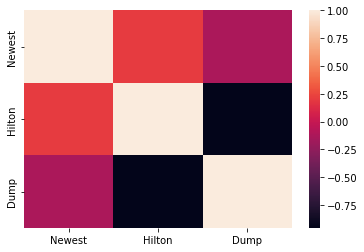

In [239]:
## Use a correlation coefficient heatmap to visualize the result
### Update Enviornment
import seaborn as sns
import matplotlib.pyplot as plt
## Plot the heatmap about the correlations between newest cases and political leaning
sns.heatmap(r1)
plt.show()

In [222]:
# b.	most recent number of cases per capita
## the y is the state’s political leaning 
## the varibale is the most recent number of cases of COVID per capita
## Form a new dataframe called df3 which contains only the newest cases per capital and y as political leaning
df3 = pd.DataFrame().assign(NewestPerCapital=df['2022-03-04']/df['population'],Hilton=df['percentage1'],Dump=df['percentage2'])
df3

,NewestPerCapital,Hilton,Dump
0,0.784663,38,53
31,1.948068,35,63
99,2.038644,34,60
175,0.441602,45,50
191,0.836638,62,33
251,1.811587,47,44
316,0.768375,54,41
325,0.190752,93,4
326,0.460069,53,42
330,2.141207,48,49


In [223]:
## Find the correlation between the newest cases per capital and political leaning
r2 = df3.corr()
r2

,NewestPerCapital,Hilton,Dump
NewestPerCapital,1.000000,-0.409729,0.539843
Hilton,-0.409729,1.000000,-0.955866
Dump,0.539843,-0.955866,1.000000


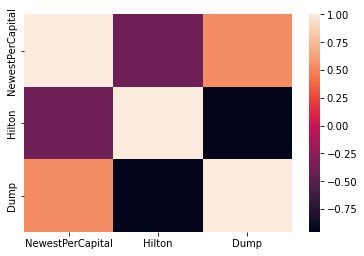

In [242]:
## Plot the heatmap of the correlation between the newest cases per capital and political leaning
sns.heatmap(r2)
plt.show()

In [243]:
# c.	projected maximum number of cases
## It is obvious that the state CA has the maximum number of cases, we need to drop other unnecassary columns such as countyFIPS
## The y is still the political leaning, while x is the # of cases from State CA
df4 = df[(df['State'] == 'CA')]
df4

,State,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,countyFIPS,population,percentage1,percentage2
191,CA,722,733,739,749,756,766,772,776,783,...,8386716,8390429,8396611,8398700,8399103,8399103,6115,10039107,62,33


In [256]:
## Form a new dataframe which contains only the maximum number of cases and political leaning
df5 = df4.drop(columns='countyFIPS')
df5 = df5.drop(columns='population')
df5 = df5.drop(columns='percentage1')
df5 = df5.drop(columns='percentage2')
df5 = df5.drop(columns='State')
df5 = pd.DataFrame(df5.values.ravel(),columns=['MaxCases'])
df5 = pd.DataFrame().assign(MaxCases=df5['MaxCases'],Hilton=62,Dump=33)
df5

,MaxCases,Hilton,Dump
0,722,62,33
1,733,62,33
2,739,62,33
3,749,62,33
4,756,62,33
...,...,...,...
768,8390429,62,33
769,8396611,62,33
770,8398700,62,33
771,8399103,62,33


In [257]:
## Find the correlation between the maximum number of cases and political leaning
r3 = df5.corr()
r3

,MaxCases,Hilton,Dump
MaxCases,1.0,NaN,NaN
Hilton,NaN,NaN,NaN
Dump,NaN,NaN,NaN


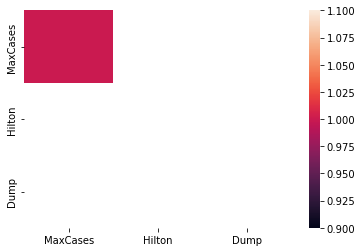

In [255]:
## Plot the correlation between the maximum number of cases and political leaning
sns.heatmap(r3)
plt.show()

In [260]:
# d.	projected maximum number of cases per capita
## Based on the information above, the variable now is the maximum # of cases per capital
df6 = pd.DataFrame().assign(MaxCases=df5['MaxCases']/10039107,Hilton=62,Dump=33)
df6

,MaxCases,Hilton,Dump
0,0.000072,62,33
1,0.000073,62,33
2,0.000074,62,33
3,0.000075,62,33
4,0.000075,62,33
...,...,...,...
768,0.835774,62,33
769,0.836390,62,33
770,0.836598,62,33
771,0.836638,62,33


In [261]:
## Find the correlation between the maximum number of cases per capital and political leaning
r4 = df6.corr()
r4

,MaxCases,Hilton,Dump
MaxCases,1.0,NaN,NaN
Hilton,NaN,NaN,NaN
Dump,NaN,NaN,NaN


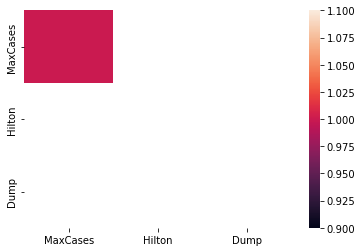

In [262]:
## Plot the heatmap of the correlation between the maximum number of cases per capital and political leaning
sns.heatmap(r4)
plt.show()

- It is not odd that the number of maximum cases per capital is also seens non-correlated with the political leaning, since the maximum cases is non-correlated as well.
- We need to form a stastical test furthuer to see whether they have no relationships.

In [264]:
# e.	rate of increase
## While y is still the political leaning
## Variables here is the rate of increase, which we apply the newest cases minus the oldest cases and then divide by the oldest cases to find the rate of change
## The dataframe contains only the rate of increase and the politica leaning
df7 = pd.DataFrame().assign(Rate_of_Increase=(df['2022-03-04']-df['2020-01-22'])/df['2020-01-22'],Hilton=df['percentage1'],Dump=df['percentage2'])
df7

,Rate_of_Increase,Hilton,Dump
0,inf,38,53
31,inf,35,63
99,inf,34,60
175,inf,45,50
191,1.163211e+04,62,33
251,inf,47,44
316,inf,54,41
325,inf,93,4
326,inf,53,42
330,inf,48,49


In [265]:
## Find the correlation between the rate of increase and the politica leaning
r5 = df7.corr()
r5

,Rate_of_Increase,Hilton,Dump
Rate_of_Increase,1.0,-1.000000,1.000000
Hilton,-1.0,1.000000,-0.955866
Dump,1.0,-0.955866,1.000000


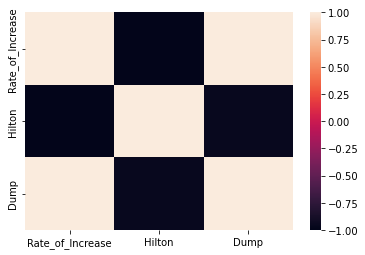

In [266]:
## Plot the heatmap about the correlation between the rate of increase and the politica leaning
sns.heatmap(r5)
plt.show()

- It's opposite situation with the last two correlations. The correlation between the rate of increase and the politica leaning seems be perfectly positive and perfectly negative correlated to the two different political leanings.
- Hence, we need to furthur to the stastical tests to analyze deeper about the relationships.

In [365]:
# f.	time of maximum increase
## In our understanding, we believe the variable here is to find the maximum increases of the number of cases, and locate when this maximum change happened
# Hence, it's safe to calculate the difference between columns at first to get the differences between each period of time
df8 = df.drop(columns='countyFIPS')
df8 = df8.drop(columns='population')
df8 = df8.drop(columns='percentage1')
df8 = df8.drop(columns='percentage2')
df8 = df8.drop(columns='State')
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 3171
Columns: 773 entries, 2020-01-22 to 2022-03-04
dtypes: int64(773)
memory usage: 310.4 KB


In [391]:
## Converting the dataframe into CSV file, which helps us later to find the exact "Time"
df8.to_csv("Numerical info.csv")

In [390]:
## Apply function iloc() to find the difference between each period of time
df9 = pd.DataFrame([df8.iloc[:,x + 1] - df8.iloc[:,x] for x in range(0,772)])
df9 = df9.T
df9

,0,1,2,3,4,5,6,7,8,9,...,762,763,764,765,766,767,768,769,770,771
0,0,0,0,0,0,0,0,0,0,0,...,291,341,403,148,246,161,395,264,236,0
31,0,0,0,0,0,0,0,0,0,0,...,1232,1225,1257,0,0,1728,786,1259,762,573
99,0,0,0,0,0,0,0,0,0,0,...,1674,508,317,0,0,1760,641,531,463,452
175,0,0,0,1,0,0,0,0,0,0,...,3974,1801,1773,0,0,1638,0,3878,0,0
191,11,6,10,7,10,6,4,7,15,27,...,3502,555,16888,2758,5941,3713,6182,2089,403,0
251,0,0,0,0,0,0,0,0,0,0,...,617,305,2170,1015,1053,829,1204,123,61,13
316,0,0,0,0,0,0,0,0,0,0,...,540,458,423,0,0,1012,170,253,589,432
325,0,0,0,0,0,0,0,0,0,0,...,48,100,112,0,0,238,59,0,0,0
326,0,0,0,0,0,0,0,0,0,0,...,98,822,130,0,0,284,35,97,142,170
330,0,0,0,0,0,0,0,0,0,0,...,3515,2942,2977,1059,1875,1970,1772,2300,1969,3011


In [ ]:
## Converting the dataframe into CSV file, which helps us later to find the exact "Time"
df9.to_csv('Difference between each time.csv')

In [384]:
## Find the maximum difference of the number of cases changed, since we wish to know the maximun increase, we only consider about the positive values
max_time = pd.DataFrame([df9.iloc[:,x].max() for x in range(0,772)])
max_time.max()
## With the maximum difference of 345159, we can locate this number in the both 2 CSV files we exported to find the 'Time'
## We can find the difference is between 2022-01-06 and 2022-01-05.

0    345159
dtype: int64

In [395]:
## Create a new dataframe which contains only the time of max differences, time of max incrases and the political leaning
df10 = pd.DataFrame().assign(Time_of_max_difference = (df['2022-01-06']-df['2022-01-05']),Time_of_max_increase = (df['2022-01-06']-df['2022-01-05'])/df['2022-01-05'], Hilton=df['percentage1'], Dump=df['percentage2'])
df10

,Time_of_max_difference,Time_of_max_increase,Hilton,Dump
0,1764,0.011427,38,53
31,12626,0.013544,35,63
99,7427,0.012728,34,60
175,10679,0.007523,45,50
191,345159,0.062412,62,33
251,35979,0.036394,47,44
316,8823,0.015903,54,41
325,2619,0.024826,93,4
326,2632,0.013640,53,42
330,76191,0.016983,48,49


In [396]:
# Find the correlation between political leaning and time of maximum increase
## y => state’s political leaning
## variable => time of maximum increase
r6 = df10.corr()
r6

,Time_of_max_difference,Time_of_max_increase,Hilton,Dump
Time_of_max_difference,1.000000,0.357133,0.284020,-0.260235
Time_of_max_increase,0.357133,1.000000,0.387210,-0.401680
Hilton,0.284020,0.387210,1.000000,-0.955866
Dump,-0.260235,-0.401680,-0.955866,1.000000


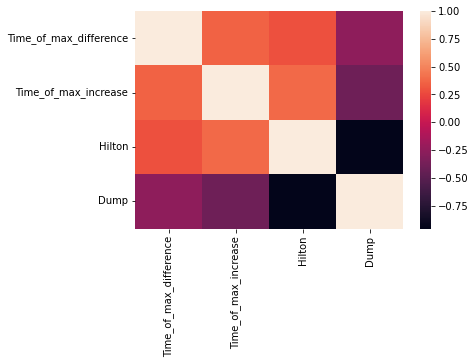

In [397]:
## Plot the heatmap of the correlation between political leaning and time of maxium increase
sns.heatmap(r6)
plt.show()

### Step 5: Testing and report on statistically significant
- From the pervious correlations calcualtions and analysis, we are doubt about the 3rd, 4th, and 5th correlations.
    - Correlation between political leanings and projected maximum number of cases
    - Correlation between political leanings and projected maximum number of cases per capita
    - Correlation between political leanings and rate of increase
- The 3rd correlation is calculated from the dataframe df5 above:
    - The correlation seems extremely weak
- The 4th correlation is calculated from the dataframe df6 above:
    - The correlation seems extremly weak as well
- The 5th correlation is calcualted from the dataframe df7 above:
    - The correlation seems perfectly correlated in both positive and negative way

In [408]:
## 3rd correlation:
from statistics import mean, median, mode, stdev
med3 = np.median(df5['MaxCases'])
mn3 = np.mean(df5['MaxCases'])
print(med3,mn3)

3441521.0 2732155.025873221


In [407]:
## 4th correlation:
med4 = np.median(df6['MaxCases'])
mn4 = np.mean(df6["MaxCases"])
print(med4,mn4)

0.3428114671952396 0.27215120088601696


In [409]:
## 5th correlation:
med5 = np.median(df7['Rate_of_Increase'])
mn5 = np.mean(df7['Rate_of_Increase'])
print(med5,mn5)

inf inf


- The correlation between political leaning and rate of increase is too strong that needs to be test statstically. While the correlations between political leaning and projected maximum number of casese, and MAX number of cases per capital is too weak that catch our attention as interests.
- H0 is defined as Null hypothesis; it's a statement about a population parameter. We test the likelihood of this statement being true in order to decide whether to accept or reject our alternative hypothesis.
- Ha is defined as Alternative hypothesis; it's a statement directly contradicts the null hypothesis. We determine whether or not to accpet or reject this statement based on the likelihood of the null (opposite) hypothesis being true.

#### Hypothesis Test of 5th correlation
###### β1 = the difference between mean of rate of increase, and mean of political leaning of Hilton
###### β2 = the difference between mean of rate of increase, and mean of political leaning of Trump
- H0: β5=β6=0
- Ha: At least one β ≠ 0

In [425]:
mean_H = df7['Hilton']
mean_T = df7['Dump']
print(mean_H,mean_T)
β1 = mean_H-mn5
β2 = mean_T-mn5
print(β1,β2)

0       38
31      35
99      34
175     45
191     62
251     47
316     54
325     93
326     53
330     48
398     46
558     62
564     42
664     28
709     55
812     38
905     36
1011    33
1132    38
1197    61
1212    61
1237    48
1254    47
1338    47
1426    38
1542    40
1625    36
1682    47
1783    28
1837    34
1931    48
1942    55
1964    48
1998    48
2016    59
2080    44
2169    29
2247    52
2284    48
2352    55
2358    41
2405    32
2472    35
2568    43
2823    28
2853    50
2987    61
3002    54
3042    47
3115    26
3171    22
Name: Hilton, dtype: int64 0       53
31      63
99      60
175     50
191     33
251     44
316     41
325      4
326     42
330     49
398     51
558     30
564     52
664     59
709     39
812     57
905     57
1011    63
1132    58
1197    34
1212    35
1237    45
1254    48
1338    45
1426    57
1542    58
1625    57
1682    51
1783    64
1837    60
1931    47
1942    42
1964    40
1998    46
2016    37
2080    52
2169    65
2247 

In [426]:
from scipy.stats import ttest_ind
α = 0.05
t_statistic,p_value = stats.ttest_ind(β1,β2)
reject_H0 = p_value < α
α, p_value, reject_H0

(0.05, nan, False)

#### Hypothesis Test of 3th correlation
###### β3 = the difference between mean of max cases, and mean of political leaning of Hilton
###### β4 = the difference between mean of max cases, and mean of political leaning of Trump
- H0: β3=β4=0
- Ha: At least one β ≠ 0

In [423]:
mean_H = df5['Hilton']
mean_T = df5['Dump']
print(mean_H,mean_T)
β3 = mean_H-mn3
β4 = mean_T-mn3
print(β3,β4)

0      62
1      62
2      62
3      62
4      62
       ..
768    62
769    62
770    62
771    62
772    62
Name: Hilton, Length: 773, dtype: int64 0      33
1      33
2      33
3      33
4      33
       ..
768    33
769    33
770    33
771    33
772    33
Name: Dump, Length: 773, dtype: int64
0     -2.732093e+06
1     -2.732093e+06
2     -2.732093e+06
3     -2.732093e+06
4     -2.732093e+06
           ...     
768   -2.732093e+06
769   -2.732093e+06
770   -2.732093e+06
771   -2.732093e+06
772   -2.732093e+06
Name: Hilton, Length: 773, dtype: float64 0     -2.732122e+06
1     -2.732122e+06
2     -2.732122e+06
3     -2.732122e+06
4     -2.732122e+06
           ...     
768   -2.732122e+06
769   -2.732122e+06
770   -2.732122e+06
771   -2.732122e+06
772   -2.732122e+06
Name: Dump, Length: 773, dtype: float64


In [424]:
α = 0.05
t_statistic,p_value = stats.ttest_ind(β3,β4)
reject_H0 = p_value < α
α, p_value, reject_H0

(0.05, 0.0, True)

#### Hypothesis Test of 5th correlation
###### β5 = the difference between mean of max cases per capital, and mean of political leaning of Hilton
###### β6 = the difference between mean of max cases per capital, and mean of political leaning of Trump
- H0: β5=β6=0
- Ha: At least one β ≠ 0

In [ ]:
mean_H = df['Hilton']
mean_T = df5['Dump']
print(mean_H,mean_T)
β3 = mean_H-mn3
β4 = mean_T-mn3
print(β3,β4)